In [27]:
!pip3 install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [28]:
##スクレイピング

import requests
from bs4 import BeautifulSoup

# ウェブサイトのURL
url = "https://www.data.jma.go.jp/obd/stats/etrn/view/daily_a1.php?prec_no=45&block_no=0381&year=2023&month=12&day=&view="

# Requestsを使用してHTMLを取得
response = requests.get(url)

# HTMLをBeautifulSoupで解析
soup = BeautifulSoup(response.text, 'html.parser')

# 数値を含む要素を選択（ここでは<span>タグを選択していますが、実際のサイトに合わせて変更してください）
numeric_elements = soup.find_all('td', class_='data_0_0')  

# 数値を抽出して表示
for element in numeric_elements:
    # 数値以外の文字を取り除いてから表示
    numeric_value = ''.join(char for char in element.text if char.isdigit())
    print("Extracted Numeric Value:", numeric_value)

Extracted Numeric Value: 00
Extracted Numeric Value: 00
Extracted Numeric Value: 00
Extracted Numeric Value: 74
Extracted Numeric Value: 131
Extracted Numeric Value: 36
Extracted Numeric Value: 58
Extracted Numeric Value: 34
Extracted Numeric Value: 11
Extracted Numeric Value: 29
Extracted Numeric Value: 
Extracted Numeric Value: 49
Extracted Numeric Value: 
Extracted Numeric Value: 
Extracted Numeric Value: 38
Extracted Numeric Value: 
Extracted Numeric Value: 
Extracted Numeric Value: 00
Extracted Numeric Value: 00
Extracted Numeric Value: 00
Extracted Numeric Value: 69
Extracted Numeric Value: 139
Extracted Numeric Value: 11
Extracted Numeric Value: 66
Extracted Numeric Value: 35
Extracted Numeric Value: 14
Extracted Numeric Value: 31
Extracted Numeric Value: 
Extracted Numeric Value: 65
Extracted Numeric Value: 
Extracted Numeric Value: 
Extracted Numeric Value: 91
Extracted Numeric Value: 
Extracted Numeric Value: 
Extracted Numeric Value: 00
Extracted Numeric Value: 00
Extracted 

In [29]:
!pip3 install lxml

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [30]:
!pip3 install html5lib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [31]:
##スクレイピング

import pandas as pd

dfs = pd.read_html("https://www.data.jma.go.jp/obd/stats/etrn/view/daily_a1.php?prec_no=45&block_no=0381&year=2023&month=12&day=&view=")
print(dfs)

[     日     降水量                            気温                   湿度         \
     日 合計 (mm) 最大1時間 (mm) 最大10分間 (mm) 平均 (℃) 最高 (℃) 最低 (℃) 平均 (％) 最小 (％)   
     日 合計 (mm) 最大1時間 (mm) 最大10分間 (mm) 平均 (℃) 最高 (℃) 最低 (℃) 平均 (％) 最小 (％)   
0    1     0.0        0.0         0.0    7.4   13.1    3.6     58     34   
1    2     0.0        0.0         0.0    6.9   13.9    1.1     66     35   
2    3     0.0        0.0         0.0    8.6   15.4    1.7     61     36   
3    4     0.0        0.0         0.0    8.5   14.8    2.9     55     31   
4    5     0.0        0.0         0.0    7.0   10.0    2.3     72     55   
5    6     0.5        0.5         0.5   10.6   16.0    7.1     80     59   
6    7     0.0        0.0         0.0   12.0   19.6    5.3     59     30   
7    8     0.0        0.0         0.0    9.8   17.3    3.1     58     34   
8    9     0.0        0.0         0.0   11.1   21.0    3.6     73     33   
9   10     0.0        0.0         0.0   11.3   20.3    5.6     77     47   
10  11     

In [34]:
##スクレイピングした表をcsvにする

import csv
import urllib
from bs4 import BeautifulSoup

In [37]:
url = "https://www.data.jma.go.jp/obd/stats/etrn/view/daily_a1.php?prec_no=45&block_no=0381&year=2023&month=12&day=&view="
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
# HTMLから表(tableタグ)の部分を全て取得する
table = soup.find_all("table")

In [39]:
for tab in table:
    table_className = tab.get("class")
    print(table_className)
    if table_className and table_className[0] == "data2_s":
        break

# break文がないときの出力結果
# ['vertical-navbox', 'nowraplinks', 'hlist']
# ['wikitable'] <- ここで,break文を使って抜ける
# ['wikitable', 'sortable']
# ['wikitable', 'sortable']
# ['wikitable']
# ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']

None
None
None
None
None
['data2_s']


In [44]:
for tab in table:
    table_className = tab.get("class")
    if table_className and table_className[0] == "data2_s":
        # CSV保存部分
        with open("weather.csv", "w", encoding='utf-8') as file:
            writer = csv.writer(file)
            rows = tab.find_all("tr")
            for row in rows:
                csvRow = []
                for cell in row.findAll(['td', 'th']):
                    csvRow.append(cell.get_text())
                writer.writerow(csvRow)
        break

In [53]:
import csv
import glob

files = glob.glob("./csv/DSPG_LAST")    #ファイルの一覧
test1 = open('sleep_weather.csv', 'w', encoding='utf-8')    #結合結果ファイル
writer = csv.writer(test1,lineterminator='\n')  #CSVファイル書き込み

for file in files:
    print(file) #ファイル確認用
    f = open(file, encoding="utf_8")    #結合元オープン
    reader = csv.reader(f)  #CSVファイル読み込み
    header = next(reader)   #1行目を読み飛ばす
    writer.writerows(reader)    #複数行書き込み
    f.close()   #結合元クローズ

test1.close()   #結合結果クローズ

In [59]:
import csv
import os

In [60]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [109]:
##ひとつのcsvにする

import pandas as pd
# CSVファイルをデータフレームとして読み込む
df1 = pd.read_csv("sleep_time.csv")
df2 = pd.read_csv("weather.csv")
# データフレームをインデックスを基準に結合
result = df1.join(df2, lsuffix="_left", rsuffix="_right")
# 結果を表示
print(result)
# 結果をCSVファイルに保存
result.to_csv("sleep_weather.csv", index=False)

    Unnamed: 0  sleep_time   日   降水量   気温   湿度  風向・風速  日照時間(h)     雪  \
0            1         6.1   1   0.0  0.0  0.0    7.4     13.1   3.6   
1            2         4.1   2   0.0  0.0  0.0    6.9     13.9   1.1   
2            3         6.0   3   0.0  0.0  0.0    8.6     15.4   1.7   
3            4         6.0   4   0.0  0.0  0.0    8.5     14.8   2.9   
4            5         4.9   5   0.0  0.0  0.0    7.0     10.0   2.3   
5            6         6.9   6   0.5  0.5  0.5   10.6     16.0   7.1   
6            7         6.0   7   0.0  0.0  0.0   12.0     19.6   5.3   
7            8         6.7   8   0.0  0.0  0.0    9.8     17.3   3.1   
8            9         6.8   9   0.0  0.0  0.0   11.1     21.0   3.6   
9           10         6.4  10   0.0  0.0  0.0   11.3     20.3   5.6   
10          20         6.9  11   0.0  0.0  0.0   12.3     18.6   6.9   
11          21         6.4  12  19.0  4.0  1.5   12.6     14.7   9.8   
12          22         6.9  13   0.0  1.5  0.5    9.4     15.1  

In [110]:
##いらない列の削除

import pandas as pd 
df = pd.read_csv('sleep_weather.csv')
df.head()#head()をつけて（）に数字をいれることで頭から指定行をとりだせます。何も入れない場合は5行です。
df = df.drop(["Unnamed: 0","日","降水量","気温","湿度","日照時間(h)","雪","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17"], axis=1)#axis=1で列方向
df.head()
df.to_csv('sleep_weather2.csv')

In [113]:
##図の表示

import numpy as np

data_set = np.genfromtxt(
    fname="sleep_weather2.csv",
    dtype="float",
    delimiter=",",
    missing_values='',  # specify the missing values to be replaced
    filling_values=np.nan  # specify the value to fill missing values
)


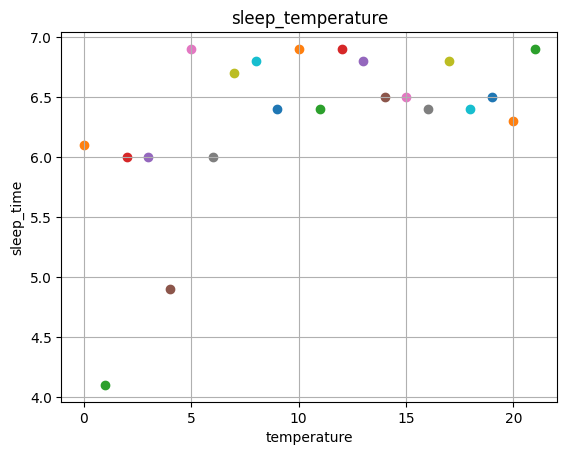

In [116]:
import matplotlib.pyplot as plt

#散布図を描画
#描画するだけで図を表示してくれる訳ではないので注意
for data in data_set:
    plt.scatter(data[0], data[1])

plt.title("sleep_temperature") #タイトル
plt.xlabel("temperature") #x軸のラベル
plt.ylabel("sleep_time") #y軸のラベル
plt.grid() #グリッド線を引く(引かなくてもいい別に)

plt.show() #show関数を使うことで図が表示される　書かないと表示されない
